# Problem Statement

You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.

In [1]:
#Import Needed packages
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
#To ignore unwanted warnings
warnings.filterwarnings("ignore")

In [3]:
#To read the CSV
Df = pd.read_csv('/Users/joesnowafc/Downloads/insurance_train.csv')
Df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [4]:
Df['job'] = Df['job'].replace(['admin.'],'admin')

# studies assumption

job_technician = Df[Df.job == 'technician']
job_management = Df[Df.job == 'management']
job_entrepreneur = Df[Df.job == 'entrepreneur']
job_bluecollar = Df[Df.job == 'blue-collar']
job_retired = Df[Df.job == 'retired']
job_admin = Df[Df.job == 'admin']
job_services = Df[Df.job == 'services']
job_self_employed = Df[Df.job == 'self-employed']
job_unemployed = Df[Df.job == 'unemployed']
job_housemaid = Df[Df.job == 'housemaid']
job_student = Df[Df.job == 'student']
job_unknown = Df[Df['job']=='unknown']
removal_1 = job_unknown[job_unknown['education_qual']=='unknown'] #Useless rows 


In [5]:
Df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


# Removing Useless columns

In [6]:
Df.drop(columns='prev_outcome',inplace=True,axis=1)
Df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,y
0,58,management,married,tertiary,unknown,5,may,261,1,no
1,44,technician,single,secondary,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,no
4,33,unknown,single,unknown,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,no


In [7]:
removal_index = removal_1.index
removal_rows = []
for i in removal_index:
    removal_rows.append(i)
removal_rows

[4,
 216,
 354,
 876,
 2046,
 2848,
 3513,
 3985,
 4750,
 6966,
 7181,
 9002,
 9010,
 9058,
 9093,
 9166,
 9235,
 9370,
 9388,
 9400,
 9406,
 9456,
 9597,
 9605,
 9894,
 10146,
 10168,
 10207,
 10220,
 10343,
 10394,
 10635,
 10867,
 11062,
 11154,
 11208,
 11258,
 11269,
 11322,
 11334,
 11523,
 11533,
 11540,
 11666,
 11747,
 11752,
 11812,
 12085,
 12147,
 12187,
 12203,
 12218,
 12750,
 16128,
 17704,
 17739,
 17845,
 17922,
 18079,
 18519,
 18593,
 18844,
 18849,
 18883,
 18890,
 18933,
 18943,
 18944,
 19045,
 19062,
 19065,
 19069,
 19275,
 19405,
 20120,
 20391,
 21148,
 21517,
 21745,
 22015,
 22219,
 22660,
 22815,
 22926,
 22979,
 23944,
 24081,
 24175,
 25748,
 27158,
 27734,
 27844,
 27927,
 28075,
 29533,
 29602,
 31536,
 32089,
 33720,
 33736,
 33944,
 39564,
 39803,
 39843,
 40109,
 40480,
 40679,
 40725,
 40785,
 40837,
 41461,
 41524,
 41723,
 41985,
 42090,
 42394,
 42616,
 42739,
 43089,
 43653,
 44120,
 44405,
 44651,
 44742,
 44970,
 45141,
 45186]

In [8]:
Df.drop(removal_rows,inplace=True,axis=0)

In [9]:
Df.reset_index(inplace=True)

In [10]:
Df

,index,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,y
0,0,58,management,married,tertiary,unknown,5,may,261,1,no
1,1,44,technician,single,secondary,unknown,5,may,151,1,no
2,2,33,entrepreneur,married,secondary,unknown,5,may,76,1,no
3,3,47,blue-collar,married,unknown,unknown,5,may,92,1,no
4,5,35,management,married,tertiary,unknown,5,may,139,1,no
...,...,...,...,...,...,...,...,...,...,...,...
45079,45206,51,technician,married,tertiary,cellular,17,nov,977,3,yes
45080,45207,71,retired,divorced,primary,cellular,17,nov,456,2,yes
45081,45208,72,retired,married,secondary,cellular,17,nov,1127,5,yes
45082,45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,no


In [11]:
job_bluecollar['education_qual']=job_bluecollar['education_qual'].replace(['unknown'],'secondary')
job_admin['education_qual']=job_admin['education_qual'].replace(['unknown'],'secondary')
job_entrepreneur['education_qual']=job_entrepreneur['education_qual'].replace(['unknown'],'tertiary')
job_housemaid['education_qual']=job_housemaid['education_qual'].replace(['unknown'],'primary')
job_management['education_qual']=job_management['education_qual'].replace(['unknown'],'tertiary')
job_retired['education_qual']=job_retired['education_qual'].replace(['unknown'],'secondary')
job_self_employed['education_qual']=job_self_employed['education_qual'].replace(['unknown'],'tertiary')
job_services['education_qual']=job_services['education_qual'].replace(['unknown'],'secondary')
job_student['education_qual']=job_student['education_qual'].replace(['unknown'],'secondary')
job_technician['education_qual']=job_technician['education_qual'].replace(['unknown'],'secondary')
job_unemployed['education_qual']=job_unemployed['education_qual'].replace(['unknown'],'secondary')

In [12]:
jobs = [job_admin,job_bluecollar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self_employed,job_services,job_student,job_technician,job_unemployed]

for i in jobs:
    Df.update(i)
    
Df

,index,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,y
0,0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,no
1,1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,no
2,2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,no
3,3,47.0,blue-collar,married,secondary,unknown,5.0,may,92.0,1.0,no
4,5,35.0,management,married,tertiary,unknown,5.0,may,139.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...
45079,45206,63.0,retired,single,tertiary,cellular,21.0,oct,212.0,2.0,yes
45080,45207,27.0,student,single,secondary,cellular,21.0,oct,256.0,2.0,no
45081,45208,34.0,technician,single,secondary,cellular,21.0,oct,339.0,3.0,yes
45082,45209,66.0,retired,married,primary,cellular,22.0,oct,56.0,2.0,no


In [13]:
still_unknown_index = []

In [14]:
still_unknown = Df[Df['education_qual']=='unknown']
for i in still_unknown.index:
    still_unknown_index.append(i)
Df.drop(still_unknown_index,inplace=True,axis=0)

In [15]:
Df

,index,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,y
0,0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,no
1,1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,no
2,2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,no
3,3,47.0,blue-collar,married,secondary,unknown,5.0,may,92.0,1.0,no
4,5,35.0,management,married,tertiary,unknown,5.0,may,139.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...
45079,45206,63.0,retired,single,tertiary,cellular,21.0,oct,212.0,2.0,yes
45080,45207,27.0,student,single,secondary,cellular,21.0,oct,256.0,2.0,no
45081,45208,34.0,technician,single,secondary,cellular,21.0,oct,339.0,3.0,yes
45082,45209,66.0,retired,married,primary,cellular,22.0,oct,56.0,2.0,no


In [16]:
Df.drop(8828,inplace=True,axis=0)

In [17]:
Df.reset_index(inplace=True)

In [18]:
Df.drop(columns=['level_0','index'],inplace=True,axis=1)

In [19]:
Df['call_type'] = Df['call_type'].replace(['unknown'],'cellular')

In [20]:
Df.job.value_counts()

blue-collar      9763
management       9490
technician       7618
admin            5183
services         4174
retired          2268
self-employed    1587
entrepreneur     1493
unemployed       1309
housemaid        1256
student           930
Name: job, dtype: int64

In [21]:
Df['target'] = Df['y'].map({'yes':1,'no':0})

# Box Plot

<Axes: xlabel='age'>

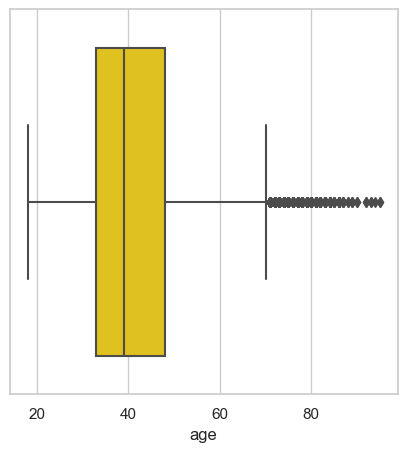

In [22]:
#For Age

sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
sns.boxplot(x=Df['age'], color='gold')

In [23]:
#IQR

#detecting Outlier for Age column
q1,q3=np.percentile(Df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 70.5 Lower age bound : 10.5


In [24]:
#removing outlier for age column
# Clip/ Strip is used to detuct value to lower & upper threshold.
Df.age = Df.age.clip(10.5,70.5)

<Axes: xlabel='day'>

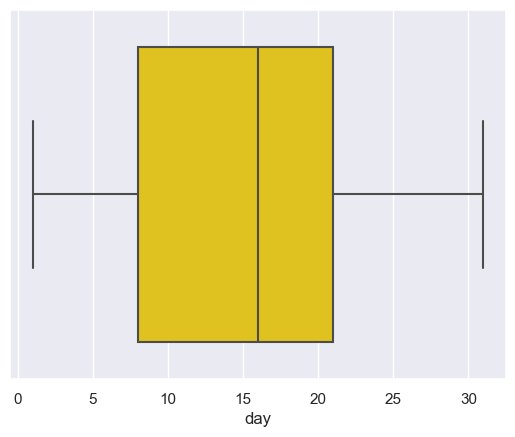

In [25]:
#For Day

sns.set(style='darkgrid')
sns.boxplot(x=Df['day'],color='gold')

In [26]:
#IQR
#detecting Outlier for day column
q1,q3 = np.percentile(Df['day'],[25,75])
IQR = q3-q1
upper = q3+1.5*IQR
lower = q1-1.5*IQR
print("Upper day bound:",upper,"Lower age bound :", lower)

Upper day bound: 40.5 Lower age bound : -11.5


<Axes: xlabel='dur'>

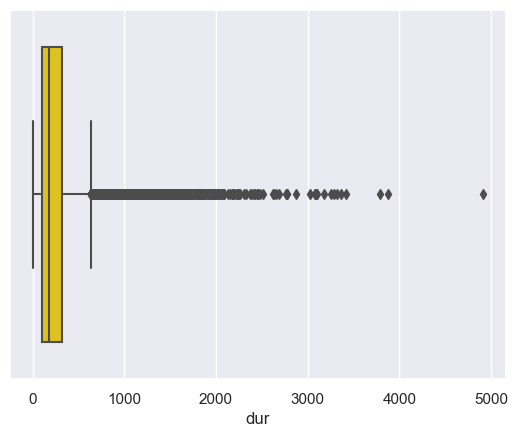

In [27]:
#For Dur

sns.set(style='darkgrid')
sns.boxplot(x=Df['dur'],color='gold')

In [28]:
#IQR
q1,q3 = np.percentile(Df['dur'],[25,75])
IQR = q3-q1
upper = q3+1.5*IQR
lower = q1-1.5*IQR
print('the upper dur bound: ',upper,"the lower dur bound: ",lower)

the upper dur bound:  640.5 the lower dur bound:  -219.5


In [29]:
#removing outlier for dur column
Df.dur = Df.dur.clip(-219.5,640.5)

<Axes: >

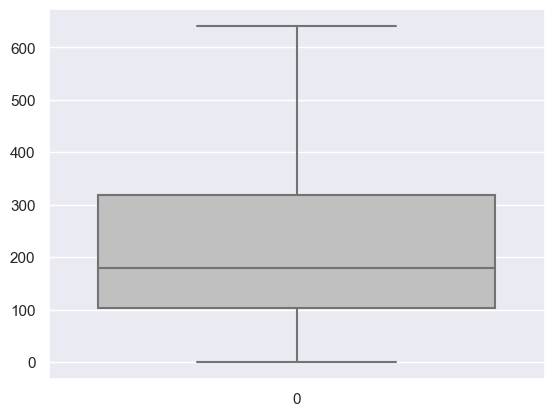

In [30]:
#check it after outlier removal
sns.boxplot(Df['dur'],color = 'silver')

<Axes: xlabel='num_calls'>

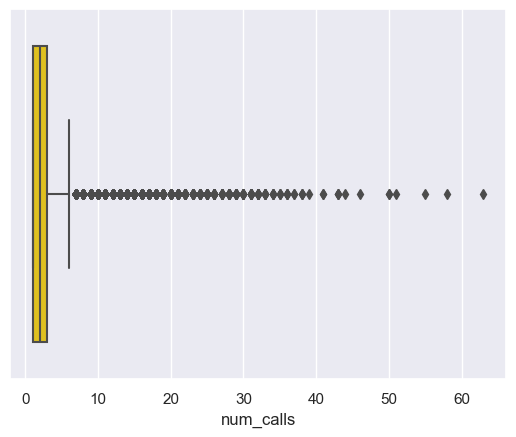

In [31]:
# For No.Of.Calls
sns.set(style='darkgrid')
sns.boxplot(x=Df['num_calls'],color='gold')

In [32]:
#IQR

q1,q3 = np.percentile(Df['num_calls'],[25,75])
IQR = q3-q1
upper = q3+1.5*IQR
lower = q1-1.5*IQR
print("the upper calls range: ",upper,"the lower calls range: ",lower)

the upper calls range:  6.0 the lower calls range:  -2.0


In [33]:
Df.num_calls = Df.num_calls.clip(-2.0,6.0)

<Axes: xlabel='num_calls'>

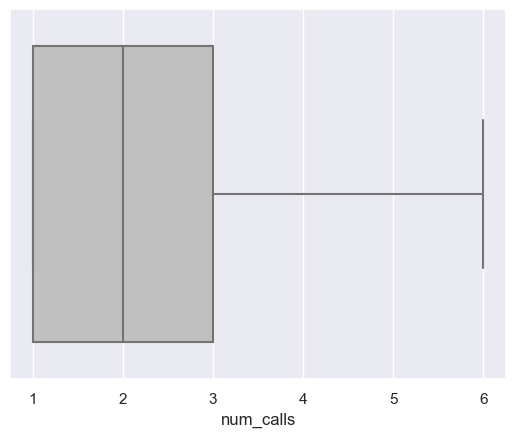

In [34]:
sns.boxplot(x=Df['num_calls'],color='silver')

# Visualization

In [35]:
Df['job'].value_counts().index[::-1]

Index(['student', 'housemaid', 'unemployed', 'entrepreneur', 'self-employed',
       'retired', 'services', 'admin', 'technician', 'management',
       'blue-collar'],
      dtype='object')

In [36]:
Df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'y', 'target'],
      dtype='object')

# Distribution plot

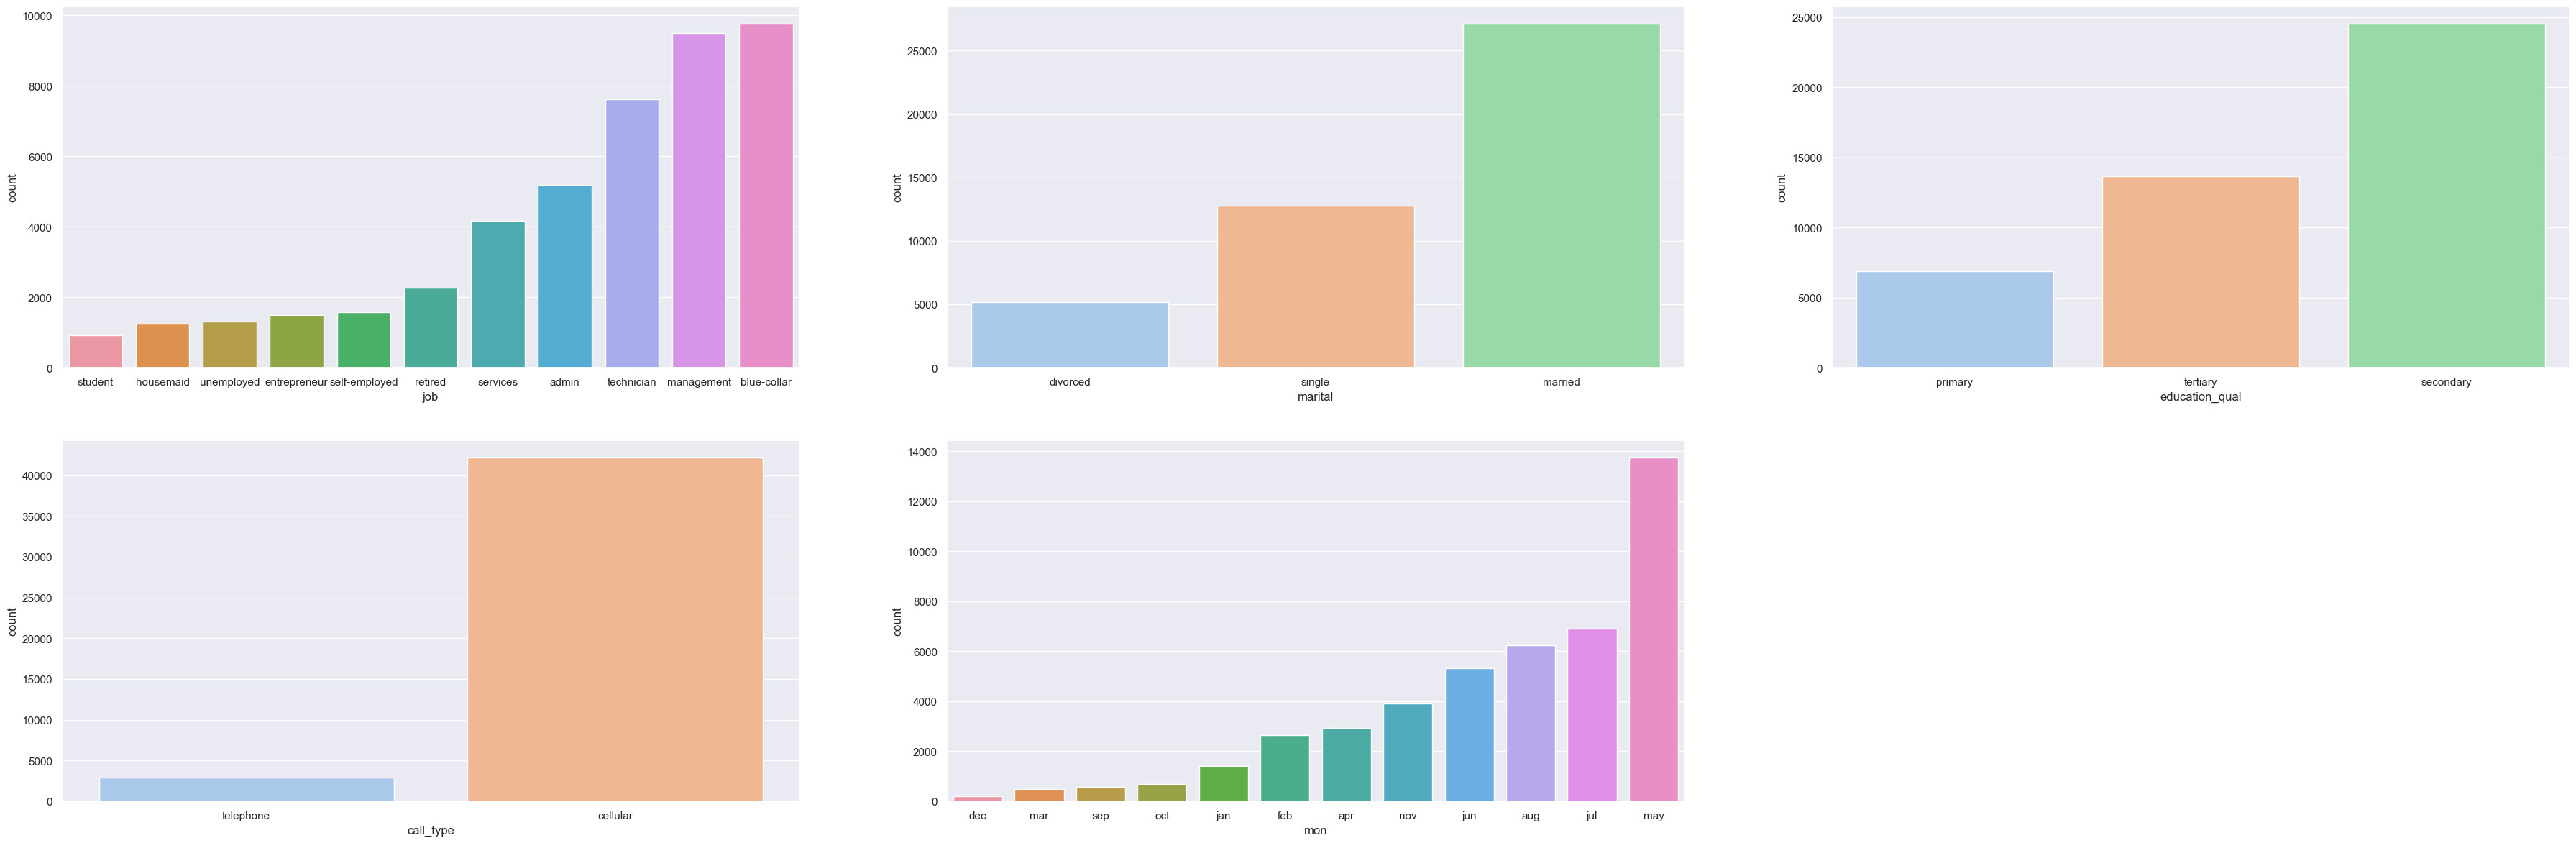

In [37]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(45,30))

#1
plt.subplot(431)
sns.countplot(x=Df["job"],order= Df['job'].value_counts().index[::-1])
plt.xlabel='job'
plt.ylabel='count'
plt.title='result according to job'

plt.subplot(432)
sns.countplot(x=Df["marital"],order= Df['marital'].value_counts().index[::-1])
plt.xlabel='marital'
plt.ylabel='count'
plt.title='result according to marital'


plt.subplot(433)
sns.countplot(x=Df["education_qual"],order= Df['education_qual'].value_counts().index[::-1])
plt.xlabel='education_qual'
plt.ylabel='count'
plt.title='result according to education_qual'


plt.subplot(434)
sns.countplot(x=Df["call_type"],order= Df['call_type'].value_counts().index[::-1])
plt.xlabel='call_type'
plt.ylabel='count'
plt.title='result according to call_type'


plt.subplot(435)
sns.countplot(x=Df["mon"],order= Df['mon'].value_counts().index[::-1])
plt.xlabel='mon'
plt.ylabel='count'
plt.title='result according to mon'

plt.show()

# Feature vs Target plot

In [38]:
Df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'y', 'target'],
      dtype='object')

In [39]:
# job_order = Df.groupby('job')['y'].mean().reset_index().sort_values('job')['y']
# # marital_order = Df.groupby('marital')['y'].mode().reset_index().sort_values('marital')['y']
# # type_order = Df.groupby('education_qual')['y'].mode().reset_index().sort_values('education_qual')['y']
# # call_type_order = Df.groupby('call_type')['y'].mode().reset_index().sort_values('call_type')['y']
# # mon_order = Df.groupby('mon')['y'].mean().reset_index().sort_values('mon')['y']

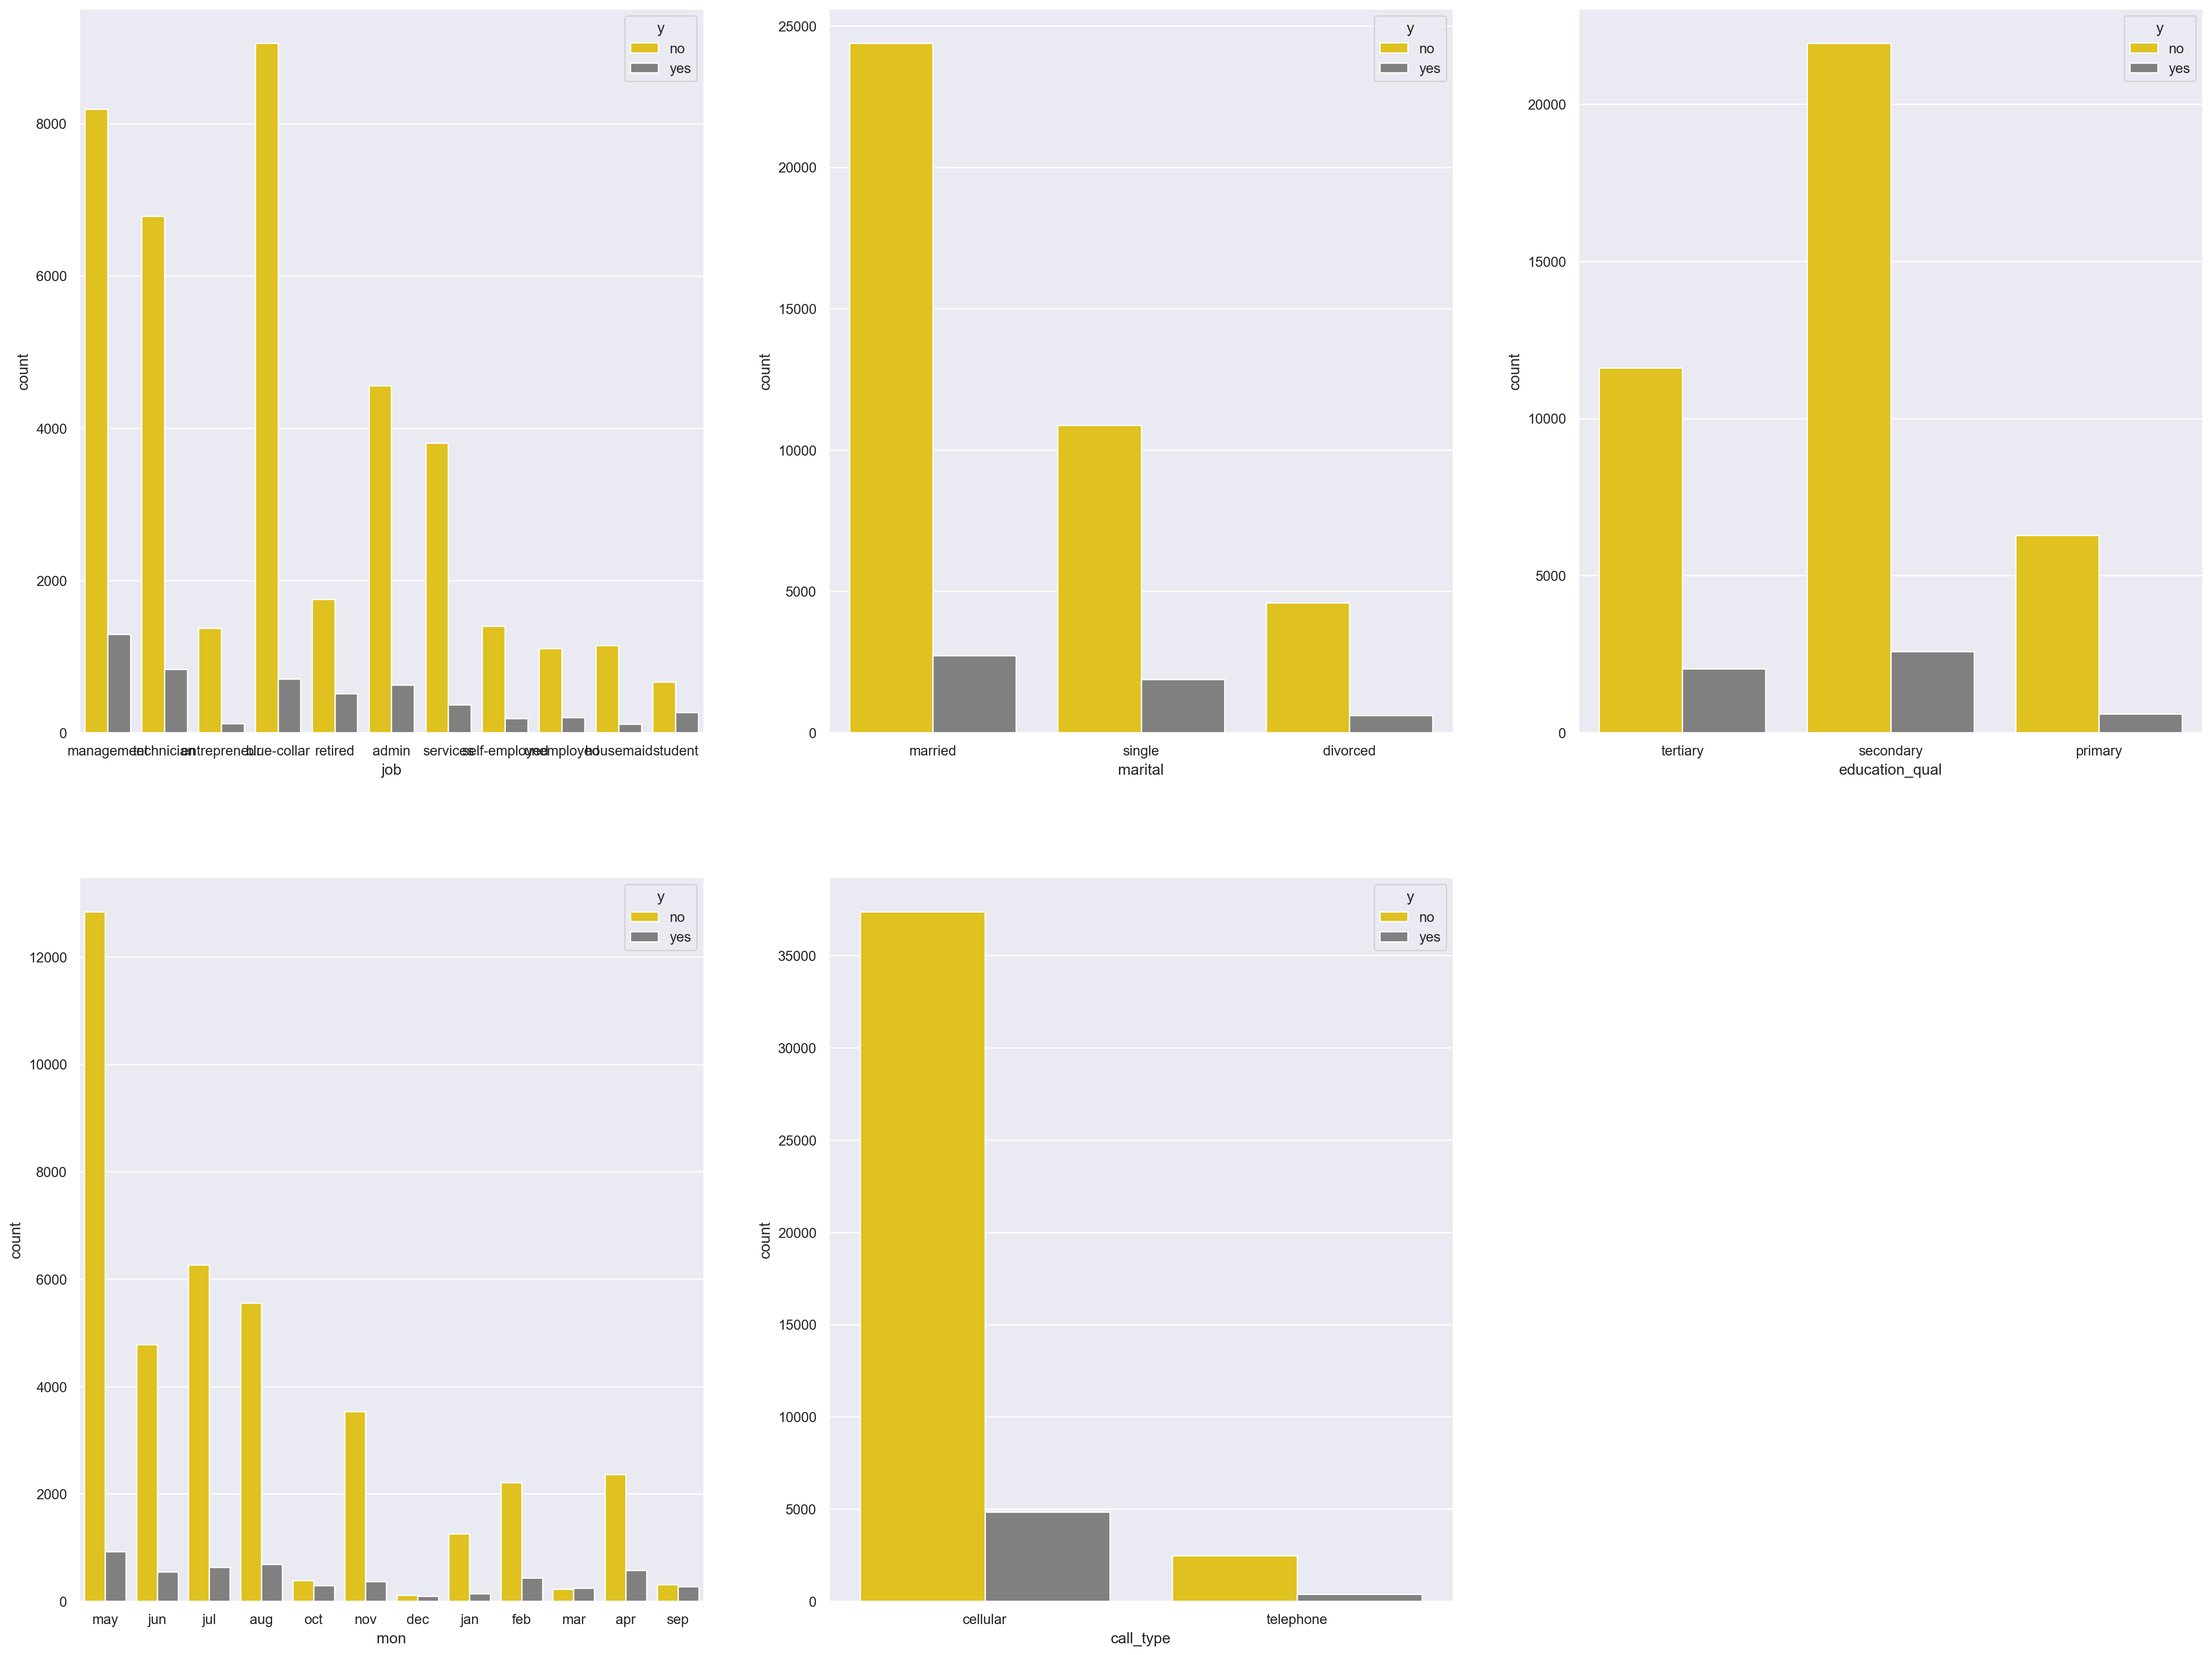

In [40]:
plt.figure(figsize=(30,35), dpi=180)
my_colors = ['gold', 'grey']

#Jobs vs Target
plt.subplot(3,3,1)
sns.countplot(x='job',hue='y',data=Df, palette=my_colors)

#Marital Status vs Target
plt.subplot(3,3,2)
sns.countplot(x='marital',hue='y',data=Df, palette=my_colors)


#Educational Qualification vs Target
plt.subplot(3,3,3)
sns.countplot(x='education_qual',hue='y',data=Df, palette=my_colors)


#Month vs Target
plt.subplot(3,3,4)
sns.countplot(x='mon',hue='y',data=Df, palette=my_colors)

#Call Type vs Target
plt.subplot(3,3,5)
sns.countplot(x='call_type',hue='y',data=Df, palette=my_colors)

plt.show()


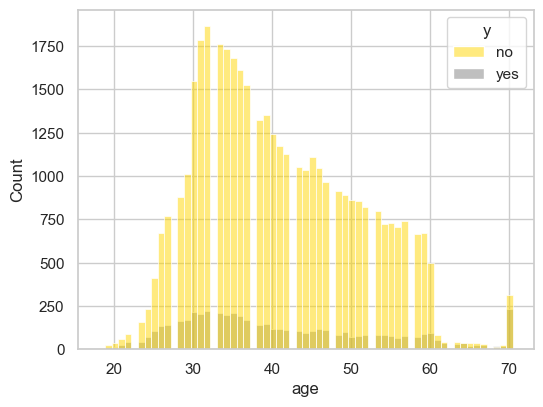

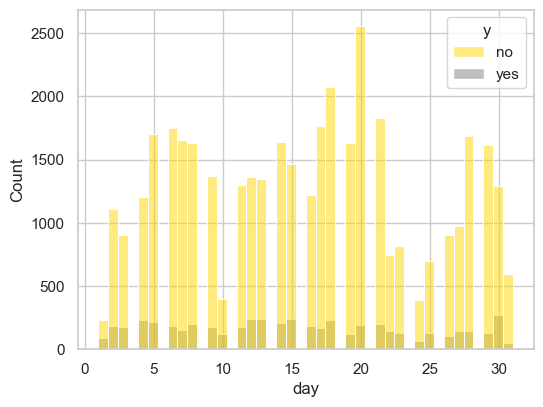

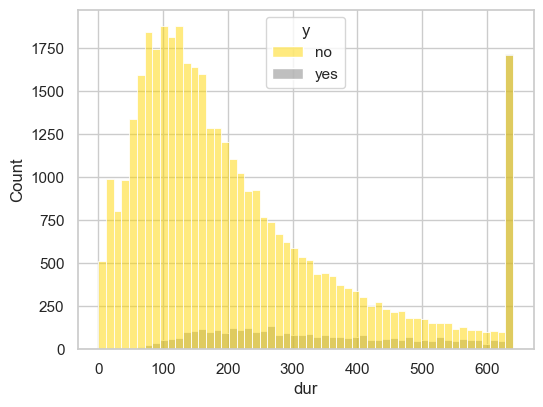

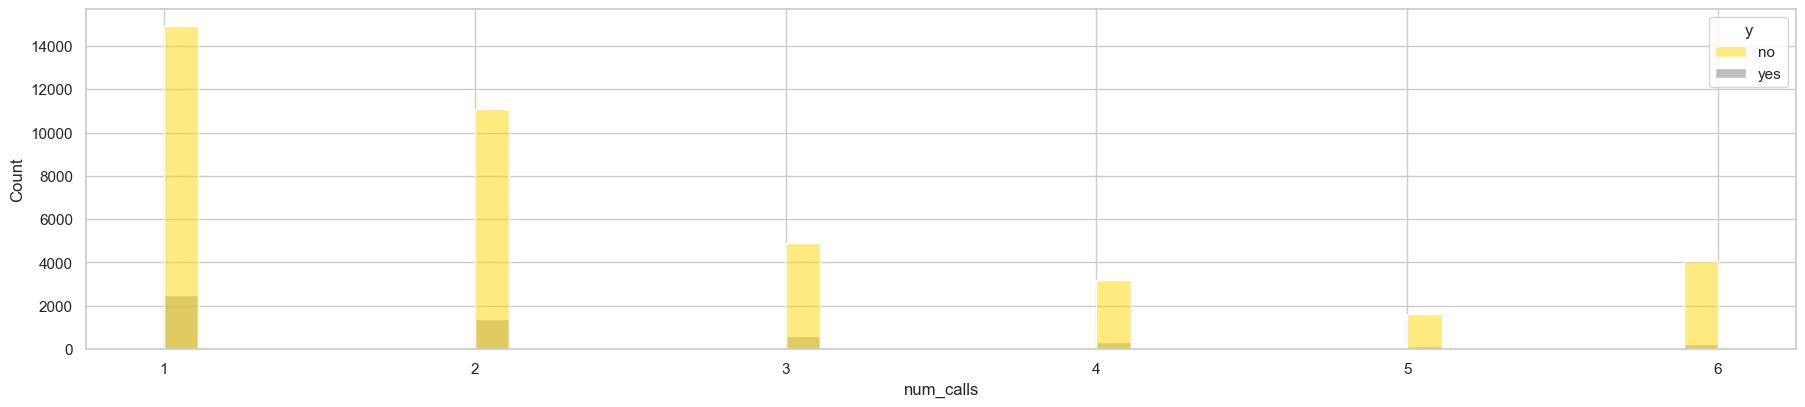

In [41]:
#For numericals
my_colors = ['gold', 'grey']
sns.set_theme(style='whitegrid',palette=my_colors)
plt.figure(figsize=(20,15))
plt.subplot(3,3,2)
sns.histplot(data=Df,x='age',hue='y')

plt.figure(figsize=(20,15))
plt.subplot(3,3,3)
sns.histplot(data=Df,x='day',hue='y')

plt.figure(figsize=(20,15))
plt.subplot(3,3,4)
sns.histplot(data=Df,x='dur',hue='y')

plt.figure(figsize=(75,15))
plt.subplot(3,3,5)
sns.histplot(data=Df,x='num_calls',hue='y')
plt.show()


# Feature vs Target Distribution

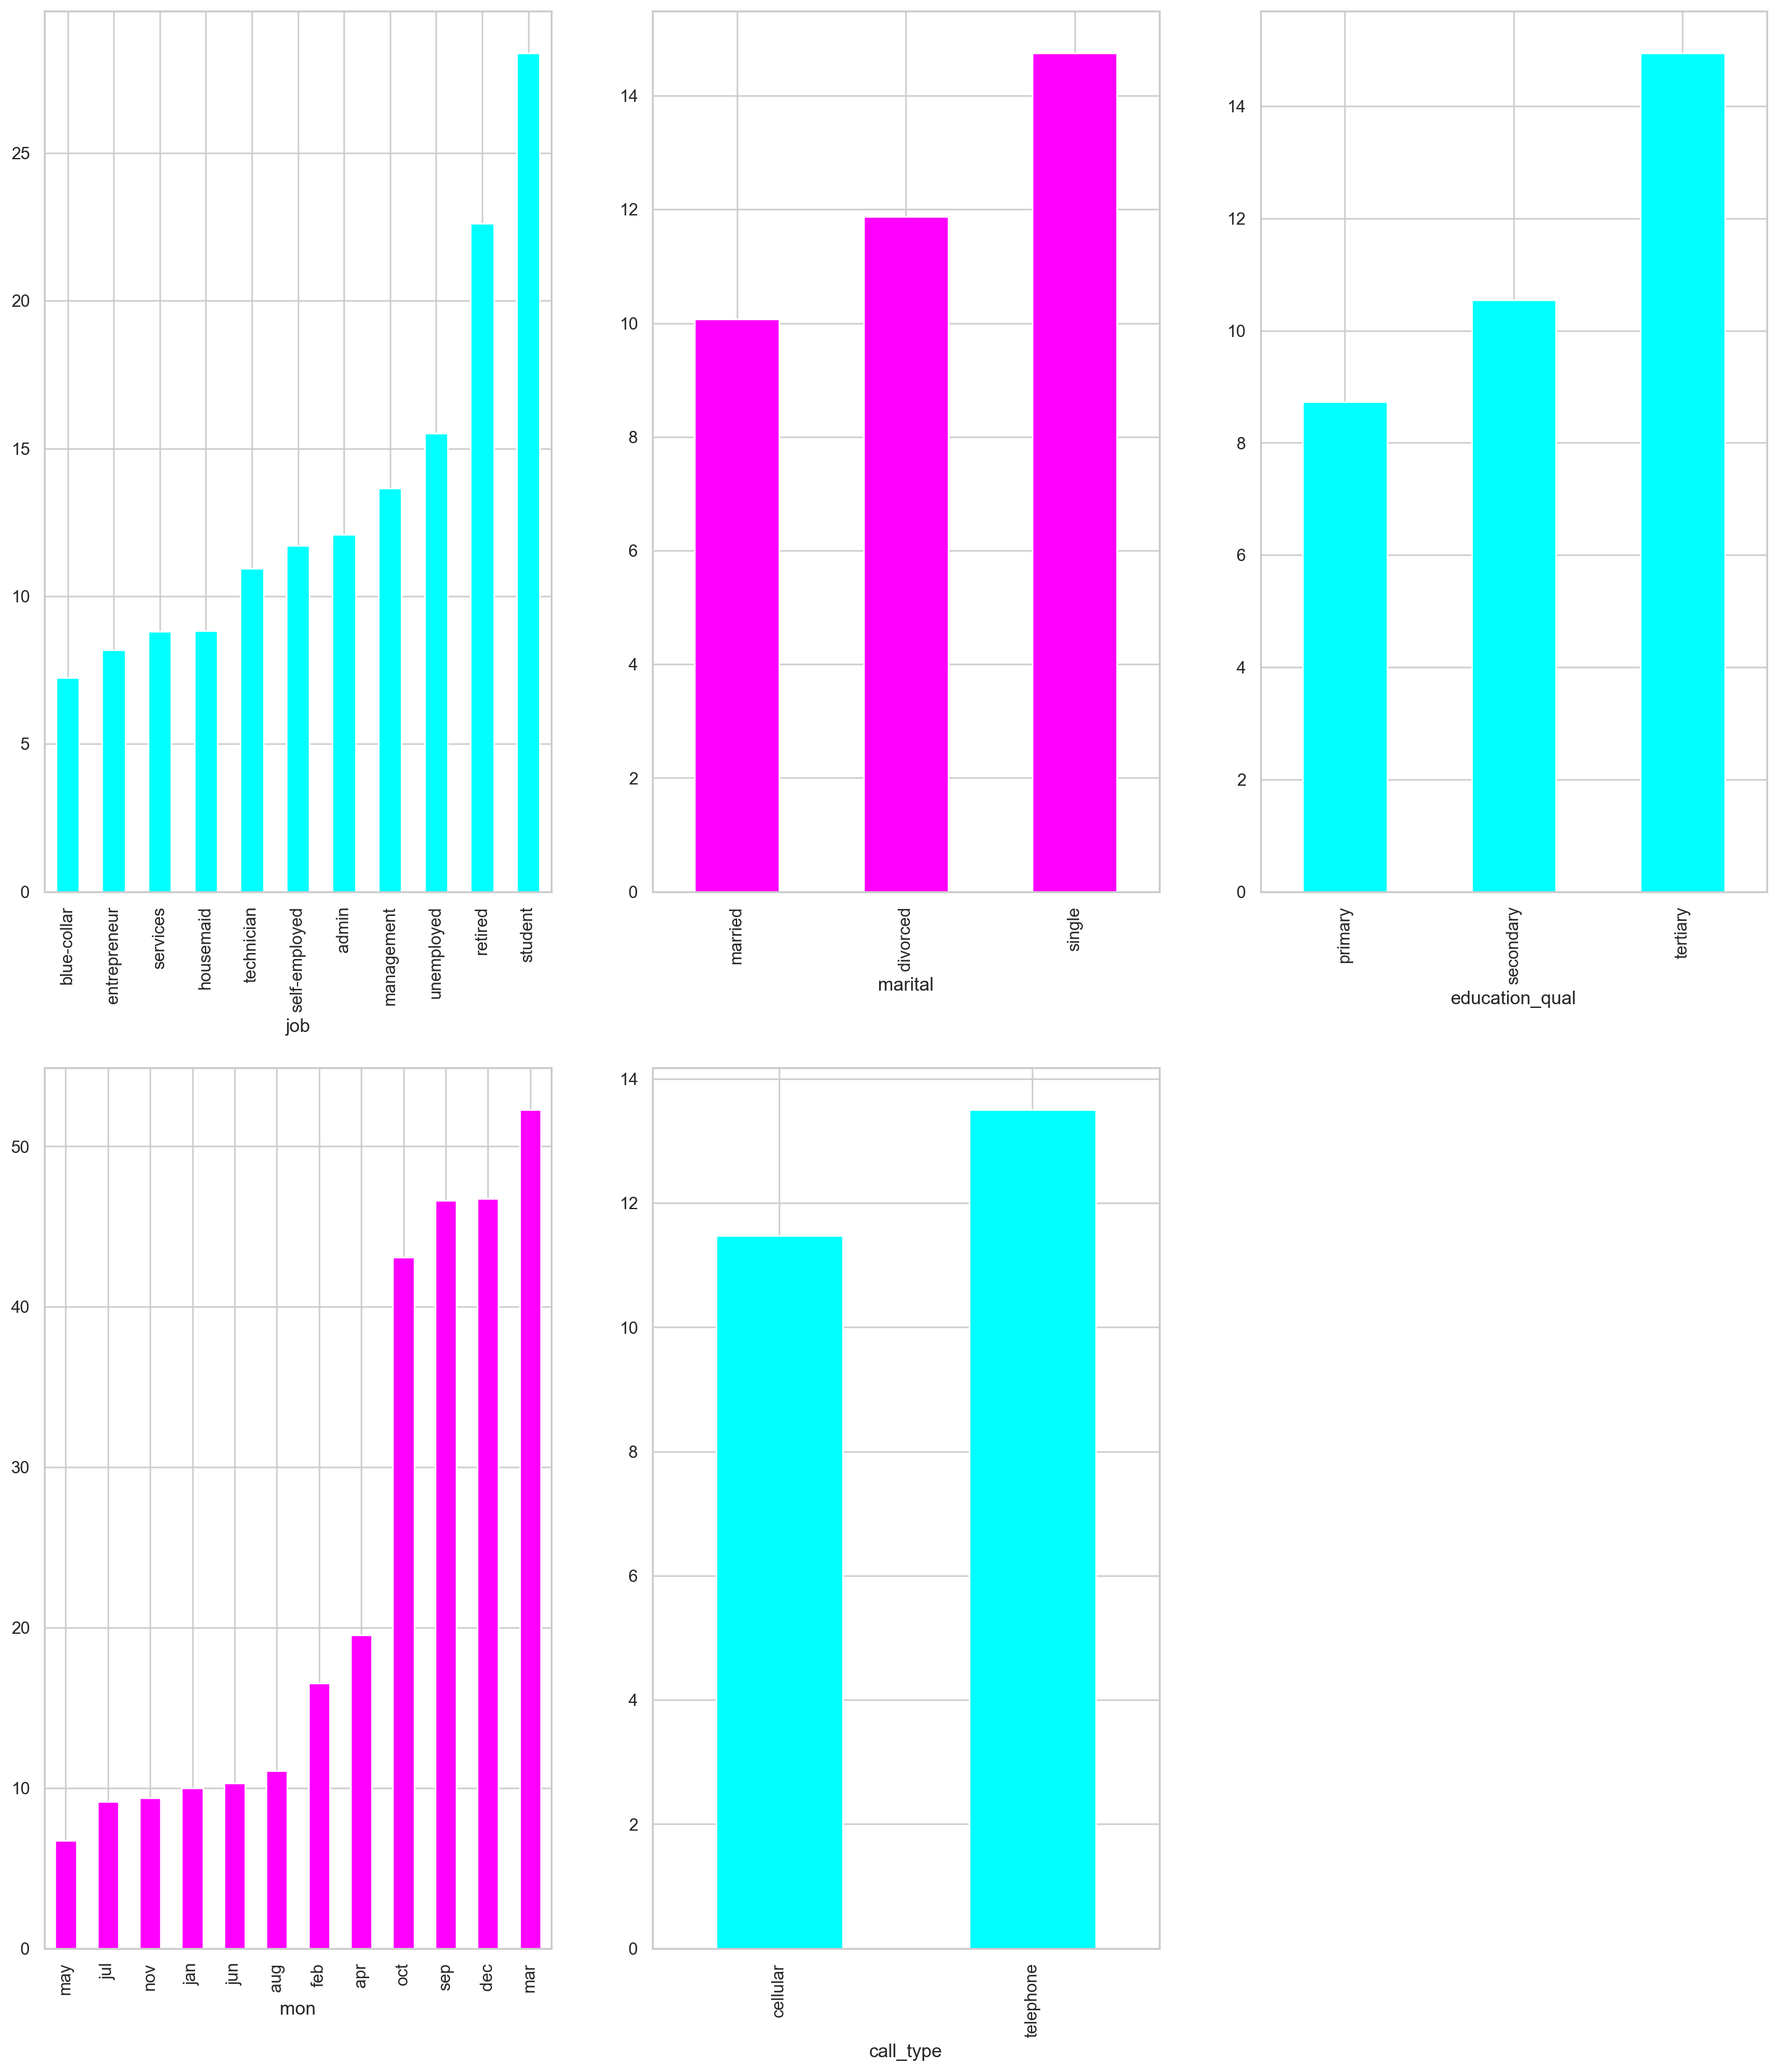

In [42]:

plt.figure(figsize=(20,35), dpi=180)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')

#Jobs vs Target
plt.subplot(3,3,1)
(Df.groupby('job')['target'].mean()*100).sort_values().plot(kind="bar",color='cyan')
# plt.xticks(rotation=50)
# plt.title('Jobs vs Target', fontweight='bold', color='maroon')
# plt.xlabel('Job', color='DarkGreen')
# plt.ylabel('y', color='DarkGreen')

#Marital Status vs Target
plt.subplot(3,3,2)
(Df.groupby('marital')['target'].mean()*100).sort_values().plot(kind="bar",color='Magenta')
# plt.xticks(rotation=50)
# plt.title('Marital Status vs Target', fontweight='bold', color='maroon')
# plt.xlabel('Marital Status', color='DarkGreen')
# plt.ylabel('y', color='DarkGreen')

#Educational Qualification vs Target
plt.subplot(3,3,3)
(Df.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind="bar",color='cyan')
# plt.xticks(rotation=50)
# plt.title('Educational Qualification vs Target', fontweight='bold', color='maroon')
# plt.xlabel('Educational Qualification', color='DarkGreen')
# plt.ylabel('y', color='DarkGreen')

#Month vs Target
plt.subplot(3,3,4)
(Df.groupby('mon')['target'].mean()*100).sort_values().plot(kind="bar",color='Magenta')
# plt.xticks(rotation=50)
# plt.title('Month vs Target', fontweight='bold', color='maroon' )
# plt.xlabel('Month', color='DarkGreen')
# plt.ylabel('y', color='DarkGreen')

#Call Type vs Target
plt.subplot(3,3,5)
(Df.groupby('call_type')['target'].mean()*100).sort_values().plot(kind="bar",color='cyan')
# plt.xticks(rotation=50)
# plt.title('Call Type vs Target', fontweight='bold', color='maroon')
# plt.xlabel('Call Type', color='DarkGreen')
# plt.ylabel('y', color='DarkGreen')

#Previous Outcome vs Target
# plt.subplot(3,3,6)
# (Df.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind="bar",color='Magenta')
# plt.xticks(rotation=50)
# plt.title('Previous Outcome vs Target', fontweight='bold', color='maroon')
# plt.xlabel('Previous Outcome', color='DarkGreen')
# plt.ylabel('y', color='DarkGreen')


plt.show()

In [43]:
Df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'y', 'target'],
      dtype='object')

# Encoding

In [44]:
Df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [45]:
Df.job = Df.job.map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin':7,'management':8,'unemployed':9,'retired':10,'student':11})
Df.marital = Df.marital.map({'married':1,'divorced':2,'single':3})
Df.education_qual = Df.education_qual.map({'primary':1,'secondary':2,'tertiary':3})
Df.call_type = Df.call_type.map({'cellular':1,'telephone':2})
Df.mon = Df.mon.map({'may':1,'jul':2,'nov':3,'jan':4,'jun':5,'aug':6,'feb':7,'apr':8,'oct':9,'sep':10,'dec':11,'mar':12})

In [46]:
x = Df.drop(columns=['y','target'])
y = Df['target']

# Split into Train and Test

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 52)

# Balancing

In [48]:
#Balancing the data
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [49]:
print(len(x_train_smt))
print(len(y_train_smt))

54254
54254


# Scaling

In [50]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# Machine Learning Models

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train_smt) # dump train datas
lr.score(x_test_scaled,y_test) #execute test datas based on fit

0.7303383250138658

In [52]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred

array([[0.93062366, 0.06937634],
       [0.7086165 , 0.2913835 ],
       [0.31244346, 0.68755654],
       ...,
       [0.97592811, 0.02407189],
       [0.76274648, 0.23725352],
       [0.05231677, 0.94768323]])

In [53]:
log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
print("AUROC score for logistic regression  :  ",round(log_reg_auroc,2))

AUROC score for logistic regression  :   0.86


# K Nearest Neighbour

In [54]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
    knn= KNeighborsClassifier(i)
    knn.fit(x_train_scaled, y_train_smt)
    print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))

K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8535794177939762
K value : 2 Train Score :  0.9831901795259336 Cross Value Accuracy : 0.8794235771537415
K value : 3 Train Score :  0.963025767685332 Cross Value Accuracy : 0.8738750489109168
K value : 4 Train Score :  0.9605559037121687 Cross Value Accuracy : 0.8786449399656947
K value : 5 Train Score :  0.9482987429498286 Cross Value Accuracy : 0.8786459243363497
K value : 6 Train Score :  0.94654771998378 Cross Value Accuracy : 0.8806419819318767
K value : 7 Train Score :  0.9391565598849855 Cross Value Accuracy : 0.8810869174679035
K value : 8 Train Score :  0.9369263095808604 Cross Value Accuracy : 0.8816413642392906
K value : 9 Train Score :  0.9308069451100379 Cross Value Accuracy : 0.8824184018250232
K value : 10 Train Score :  0.9298300586131898 Cross Value Accuracy : 0.8823069218483528
K value : 20 Train Score :  0.9125963062631327 Cross Value Accuracy : 0.8826402543613773
K value : 30 Train Score :  0.9043204187709663 C

In [55]:
knn= KNeighborsClassifier(i)
knn.fit(x_train_scaled, y_train_smt)
print("KNN Score: ",knn.score(x_test_scaled,y_test)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))

KNN Score:  0.7485302273987798
AUROC on the sampled dataset :  0.5006940063091483


# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score

In [57]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier() 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  1.0
AUROC on the sampled dataset :  0.7682675889213673


In [58]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
    # Fit dt to the training set
    dt.fit(x_train_smt, y_train_smt) # the model is trained
    trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
    dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
    valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.785601061672872  Cross val score :  0.8790903676870488
Depth  :  2  Training Accuracy :  0.8032218822575294  Cross val score :  0.8756530684063778
Depth  :  3  Training Accuracy :  0.8423342057728462  Cross val score :  0.8856354481716545
Depth  :  4  Training Accuracy :  0.8471817746156965  Cross val score :  0.882528651338375
Depth  :  5  Training Accuracy :  0.8666089136284882  Cross val score :  0.8868548373204448
Depth  :  6  Training Accuracy :  0.8819994839090205  Cross val score :  0.883084328573081
Depth  :  7  Training Accuracy :  0.8931138717882553  Cross val score :  0.8824196322883419
Depth  :  8  Training Accuracy :  0.9044125778744424  Cross val score :  0.8796466601534142
Depth  :  9  Training Accuracy :  0.915139897519077  Cross val score :  0.8795362875937306
Depth  :  10  Training Accuracy :  0.928797876654256  Cross val score :  0.8807560458815162
Depth  :  20  Training Accuracy :  0.9970509086887602  Cross val score :  0.85391299

In [59]:
dt = DecisionTreeClassifier(max_depth=5) 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  0.8666089136284882
AUROC on the sampled dataset :  0.8507705843197407


# Extreme Gradiant Boosting Classifier

In [60]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
    model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model 
    model.fit(x_train_smt,y_train_smt) #train the model
    print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))

Learning rate :  0.01  Train score :  0.9069561691303867  Cross-Val score :  0.8805322246038523
Learning rate :  0.02  Train score :  0.9226600803627383  Cross-Val score :  0.888962374892642
Learning rate :  0.03  Train score :  0.9320418770966196  Cross-Val score :  0.8898501541770537
Learning rate :  0.04  Train score :  0.9393040144505475  Cross-Val score :  0.8906253460678085
Learning rate :  0.05  Train score :  0.9444464924245217  Cross-Val score :  0.8902937362034301
Learning rate :  0.1  Train score :  0.9608139492019022  Cross-Val score :  0.8906263304384634
Learning rate :  0.11  Train score :  0.9610535628709403  Cross-Val score :  0.8905142352301336
Learning rate :  0.12  Train score :  0.9649979724997235  Cross-Val score :  0.8910701585575032
Learning rate :  0.13  Train score :  0.9662881999483909  Cross-Val score :  0.8870766898567988
Learning rate :  0.14  Train score :  0.9679839274523537  Cross-Val score :  0.8895164525250336
Learning rate :  0.15  Train score :  0.96

In [61]:
model = xgb.XGBClassifier()
model.fit(x_train_smt,y_train_smt) 
print("XG Boost Score : ", model.score(x_train_smt,y_train_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, model.predict_proba(x_test)[:, 1]))

XG Boost Score :  0.9822501566704759
AUROC on the sampled dataset :  0.8926840505889503


# Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [63]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
    rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
    # Fit dt to the training set
    rf.fit(x_train, y_train) # the model is trained
    rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
    valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9970509086887602  Cross val score :  0.8852063481806789
Depth  :  2  Training Accuracy :  0.9970509086887602  Cross val score :  0.8852063481806789
Depth  :  3  Training Accuracy :  0.9970509086887602  Cross val score :  0.8855946515400823
Depth  :  4  Training Accuracy :  0.9970509086887602  Cross val score :  0.886759484693026
Depth  :  5  Training Accuracy :  0.9970509086887602  Cross val score :  0.8894220681665554
Depth  :  6  Training Accuracy :  0.9970509086887602  Cross val score :  0.8931939985984216
Depth  :  7  Training Accuracy :  0.9970509086887602  Cross val score :  0.8947748128215958
Depth  :  8  Training Accuracy :  0.9970509086887602  Cross val score :  0.8959675236910589
Depth  :  9  Training Accuracy :  0.9970509086887602  Cross val score :  0.8963835124538159
Depth  :  10  Training Accuracy :  0.9970509086887602  Cross val score :  0.8967716850402665


In [64]:
rf = RandomForestClassifier(max_depth=10)
rf.fit(x_train_smt,y_train_smt) 
print("Random Forest Classifier Score : ", rf.score(x_train_smt,y_train_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, rf.predict_proba(x_test)[:, 1]))

Random Forest Classifier Score :  0.9424742876101301
AUROC on the sampled dataset :  0.8829396000347294


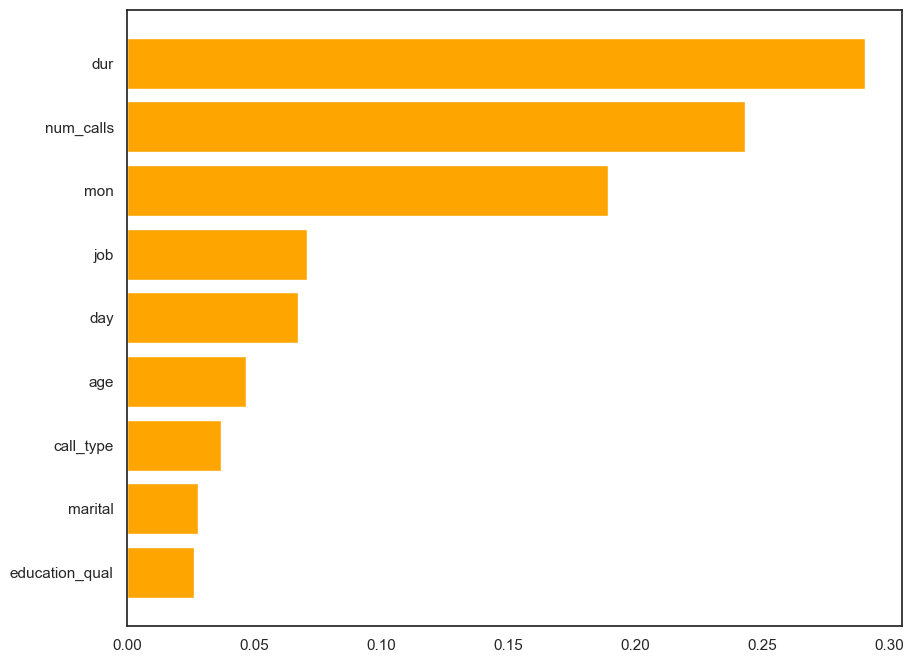

In [65]:
sorted_idx =model.feature_importances_.argsort()
my_colors = ['orange']
sns.set_theme(style='white')
sns.set_palette(palette=my_colors)
plt.figure(figsize=(10,8))
plt.barh(Df.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.show()

# Conclusion

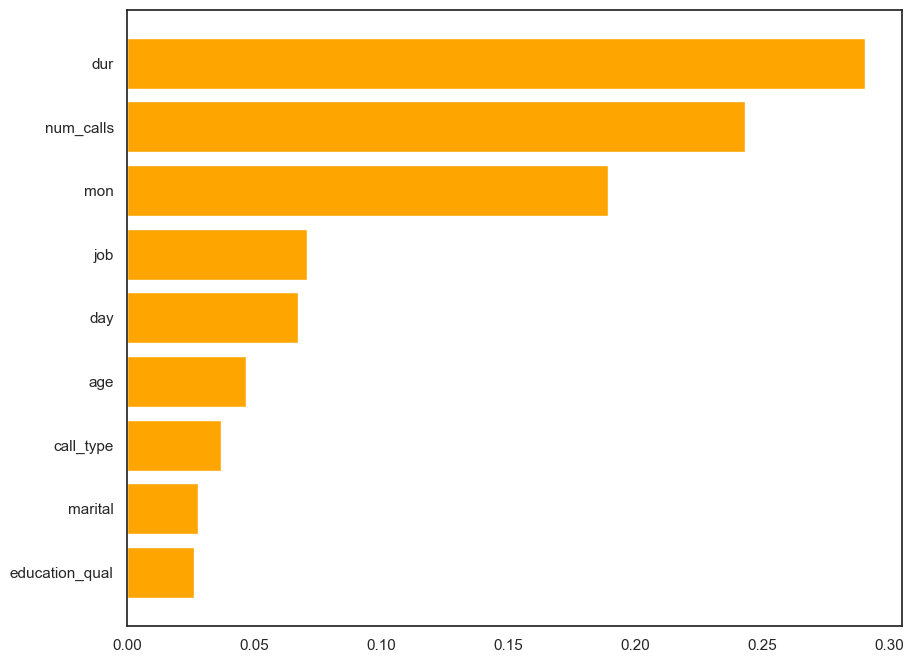

In [66]:
sorted_idx =model.feature_importances_.argsort()
my_colors = ['orange']
sns.set_theme(style='white')
sns.set_palette(palette=my_colors)
plt.figure(figsize=(10,8))
plt.barh(Df.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.show()